# Project: IBM HR Analytics Employee Attrition

#### Import all libraries - 

In [1]:
#Basic module
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


#Preparation module
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

from sklearn.preprocessing import MinMaxScaler

from sklearn.feature_selection import SelectKBest,f_classif

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.metrics import accuracy_score, confusion_matrix, roc_auc_score, ConfusionMatrixDisplay, precision_score, recall_score, f1_score, classification_report, roc_curve, plot_roc_curve, auc, precision_recall_curve, plot_precision_recall_curve, average_precision_score



#Warning handel module
import warnings
warnings.filterwarnings("ignore")

#### Import dataset - 

In [2]:
dataSet = pd.read_csv("Employee-Attrition.csv")

In [3]:
dataSet.sample(5)

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
96,24,No,Travel_Rarely,1353,Sales,3,2,Other,1,128,...,1,80,1,4,2,2,3,2,0,2
721,50,No,Travel_Rarely,939,Research & Development,24,3,Life Sciences,1,1005,...,4,80,1,22,2,3,12,11,1,5
871,24,Yes,Travel_Rarely,984,Research & Development,17,2,Life Sciences,1,1219,...,1,80,1,1,3,1,1,0,0,0
23,21,No,Travel_Rarely,391,Research & Development,15,2,Life Sciences,1,30,...,4,80,0,0,6,3,0,0,0,0
1233,30,No,Travel_Rarely,793,Research & Development,16,1,Life Sciences,1,1729,...,2,80,1,10,2,2,10,0,0,8


In [4]:
dataSet.shape

(1470, 35)

In [5]:
dataSet.isnull().sum()

Age                         0
Attrition                   0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeCount               0
EmployeeNumber              0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel                    0
JobRole                     0
JobSatisfaction             0
MaritalStatus               0
MonthlyIncome               0
MonthlyRate                 0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StandardHours               0
StockOptionLevel            0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSince

In [6]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14  JobLevel                

In [7]:
dataSet.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.00,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.00,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.00,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.00,3.0,4.00,5.0
EmployeeCount,1470.0,1.000000,0.000000,1.0,1.00,1.0,1.00,1.0
EmployeeNumber,1470.0,1024.865306,602.024335,1.0,491.25,1020.5,1555.75,2068.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.00,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.00,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.00,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.00,2.0,3.00,5.0


In [8]:
Features = []
for i in dataSet.columns:
    Features.append([i, dataSet[i].nunique(), dataSet[i].drop_duplicates().values])
pd.DataFrame(Features, columns = ['Features', 'Unique Number', 'Values'])

,Features,Unique Number,Values
0,Age,43,"[41, 49, 37, 33, 27, 32, 59, 30, 38, 36, 35, 2..."
1,Attrition,2,"[Yes, No]"
2,BusinessTravel,3,"[Travel_Rarely, Travel_Frequently, Non-Travel]"
3,DailyRate,886,"[1102, 279, 1373, 1392, 591, 1005, 1324, 1358,..."
4,Department,3,"[Sales, Research & Development, Human Resources]"
5,DistanceFromHome,29,"[1, 8, 2, 3, 24, 23, 27, 16, 15, 26, 19, 21, 5..."
6,Education,5,"[2, 1, 4, 3, 5]"
7,EducationField,6,"[Life Sciences, Other, Medical, Marketing, Tec..."
8,EmployeeCount,1,[1]
9,EmployeeNumber,1470,"[1, 2, 4, 5, 7, 8, 10, 11, 12, 13, 14, 15, 16,..."


**Droping  Feature -**

*EmployeeNumber has 1470 unique values.*

*EmployeeCount, Over18, StandardHours has 1 unique values.*

In [9]:
dataSet.drop(['EmployeeNumber','EmployeeCount','Over18','StandardHours'],1, inplace=True)

In [10]:
dataSet.shape

(1470, 31)

#### Categorical features - 

In [11]:
object_col = []
for column in dataSet.columns:
    if dataSet[column].dtype == object and len(dataSet[column].unique()) <= 30:
        object_col.append(column)
        print(f"{column} : {dataSet[column].unique()}")
        print(dataSet[column].value_counts())
        print("__________________________________________")  
print(object_col)

Attrition : ['Yes' 'No']
No     1233
Yes     237
Name: Attrition, dtype: int64
__________________________________________
BusinessTravel : ['Travel_Rarely' 'Travel_Frequently' 'Non-Travel']
Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64
__________________________________________
Department : ['Sales' 'Research & Development' 'Human Resources']
Research & Development    961
Sales                     446
Human Resources            63
Name: Department, dtype: int64
__________________________________________
EducationField : ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
Life Sciences       606
Medical             464
Marketing           159
Technical Degree    132
Other                82
Human Resources      27
Name: EducationField, dtype: int64
__________________________________________
Gender : ['Female' 'Male']
Male      882
Female    588
Name: Gender, dtype: int64
_________________

#### Data Visualization - 

In [12]:
object_col.remove('JobRole' )
object_col.remove('EducationField' ) 

In [13]:
from sklearn.preprocessing import LabelEncoder

label = LabelEncoder()
dataSet["Attrition"] = label.fit_transform(dataSet.Attrition)

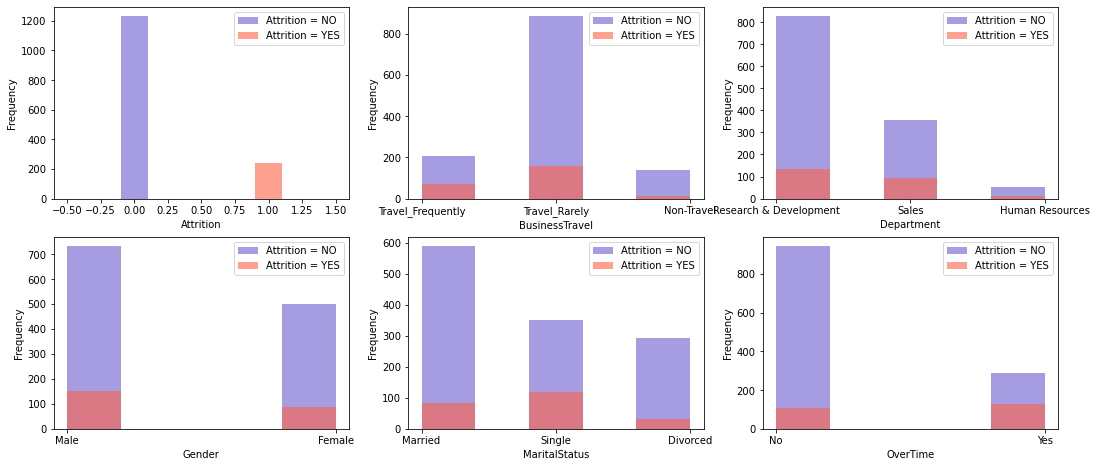

In [14]:
plt.figure(figsize=(18, 12))

for i, column in enumerate(object_col, 1):
    plt.subplot(3, 3, i)
    dataSet[dataSet["Attrition"] == 0][column].hist(bins=5,color='slateblue', label='Attrition = NO', alpha=0.6)
    dataSet[dataSet["Attrition"] == 1][column].hist(bins=5, color='tomato', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.grid(False)
    plt.xlabel(column)
    plt.ylabel("Frequency")

In [15]:
disc_col = []
for column in dataSet.columns:
    if dataSet[column].dtypes != object and dataSet[column].nunique() < 30:
        disc_col.append(column)
disc_col.remove('Attrition')

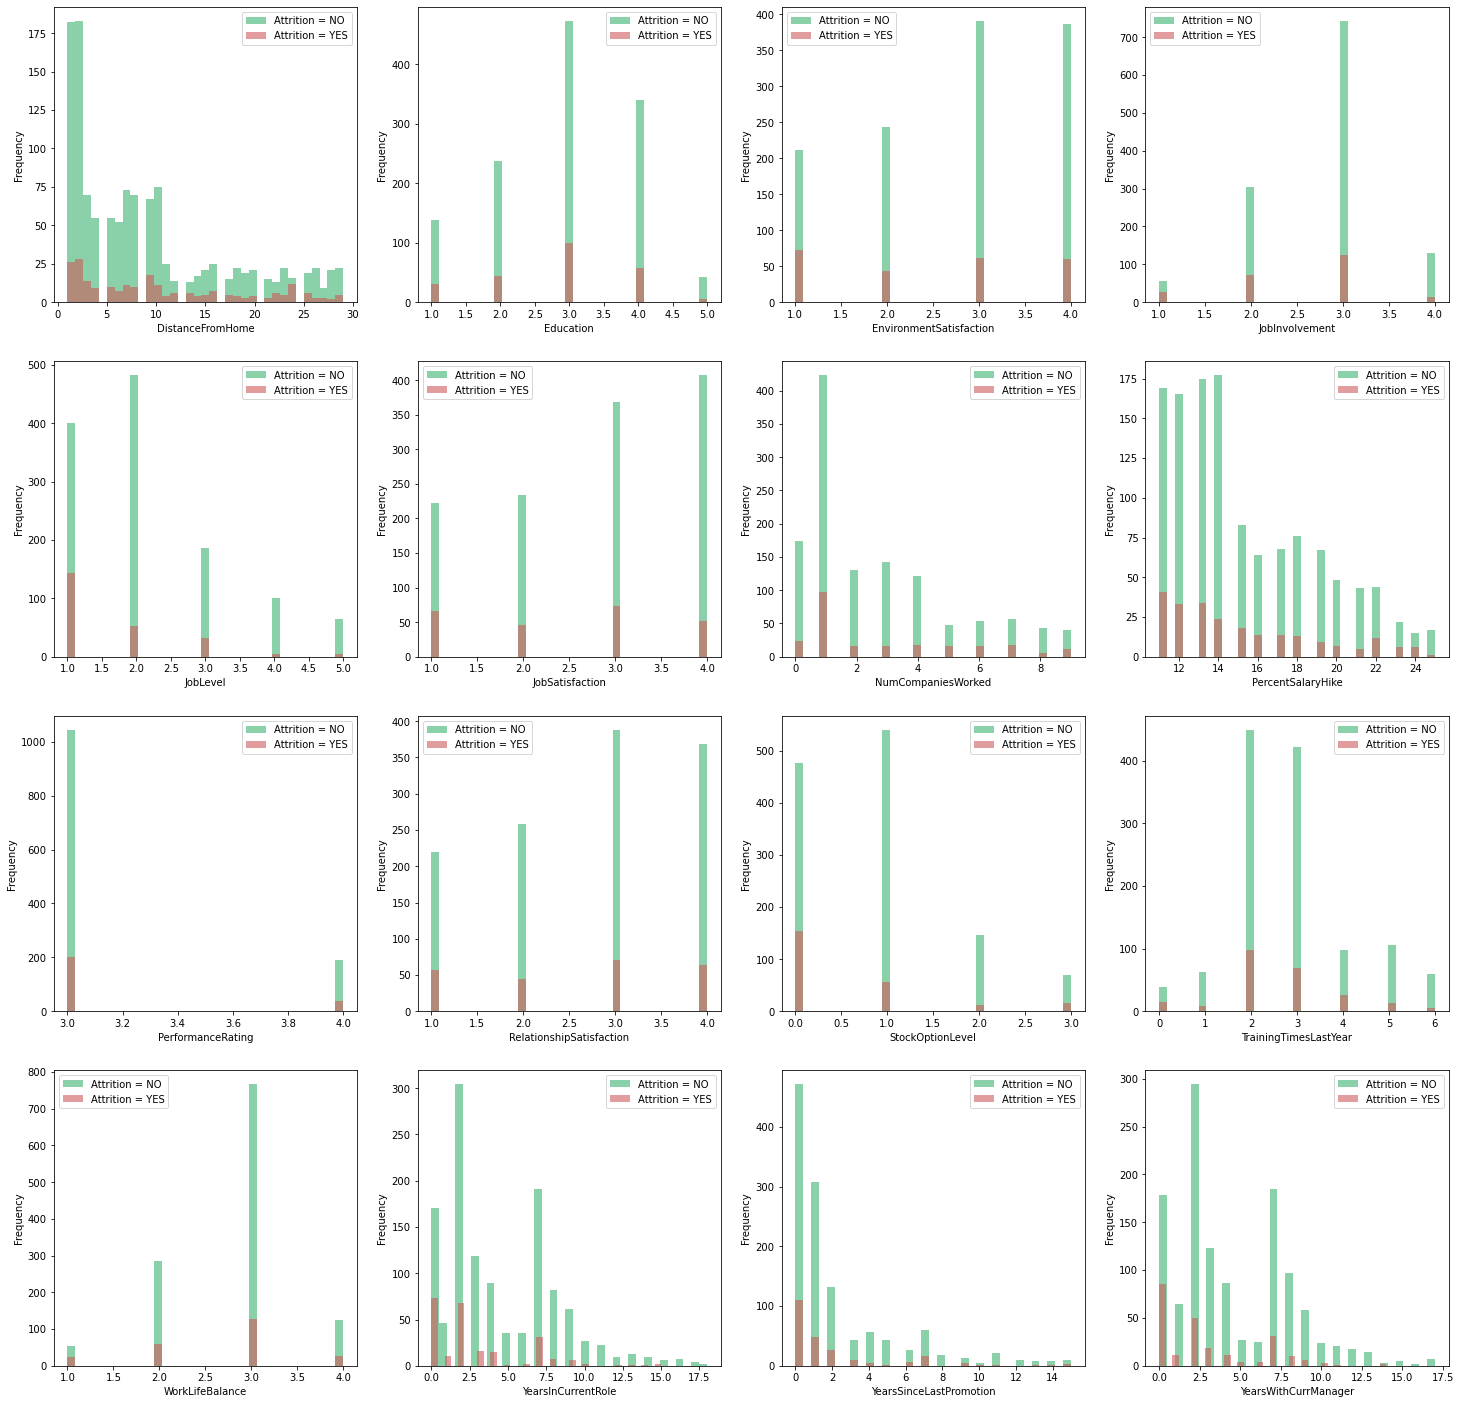

In [16]:
plt.figure(figsize=(25, 25))

for i, column in enumerate(disc_col, 1):
    plt.subplot(4, 4, i)
    dataSet[dataSet["Attrition"] == 0][column].hist(bins=35, color='mediumseagreen', label='Attrition = NO', alpha=0.6)
    dataSet[dataSet["Attrition"] == 1][column].hist(bins=35, color='indianred', label='Attrition = YES', alpha=0.6)
    plt.legend()
    plt.grid(False)
    plt.xlabel(column)
    plt.ylabel("Frequency")

Text(0, 0.5, 'Frequency')

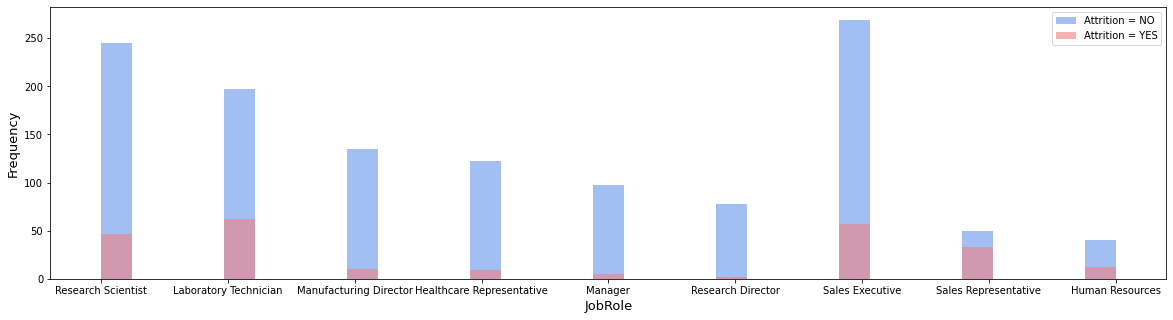

In [17]:
plt.figure(figsize=(20,5 ))
dataSet[dataSet["Attrition"] == 0]["JobRole"].hist(bins=33,color='cornflowerblue', label='Attrition = NO', alpha=0.6)
dataSet[dataSet["Attrition"] == 1]["JobRole"].hist(bins=33, color='lightcoral', label='Attrition = YES', alpha=0.6)
plt.legend()
plt.grid(False)
plt.xlabel("JobRole", fontsize=13)
plt.ylabel("Frequency", fontsize=13)

Text(0, 0.5, 'Frequency')

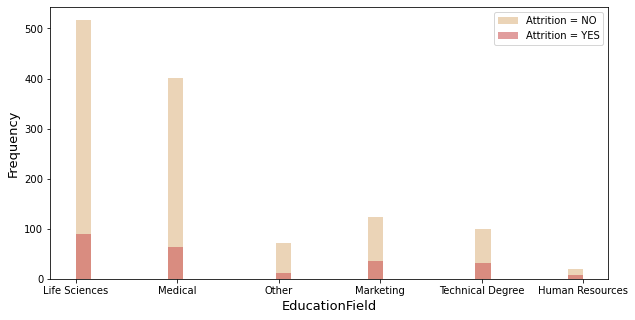

In [18]:
plt.figure(figsize=(10,5 ))
dataSet[dataSet["Attrition"] == 0]["EducationField"].hist(bins=33,color='burlywood', label='Attrition = NO', alpha=0.6)
dataSet[dataSet["Attrition"] == 1]["EducationField"].hist(bins=33, color='indianred', label='Attrition = YES', alpha=0.6)
plt.legend()
plt.grid(False)
plt.xlabel("EducationField", fontsize=13)
plt.ylabel("Frequency", fontsize=13)

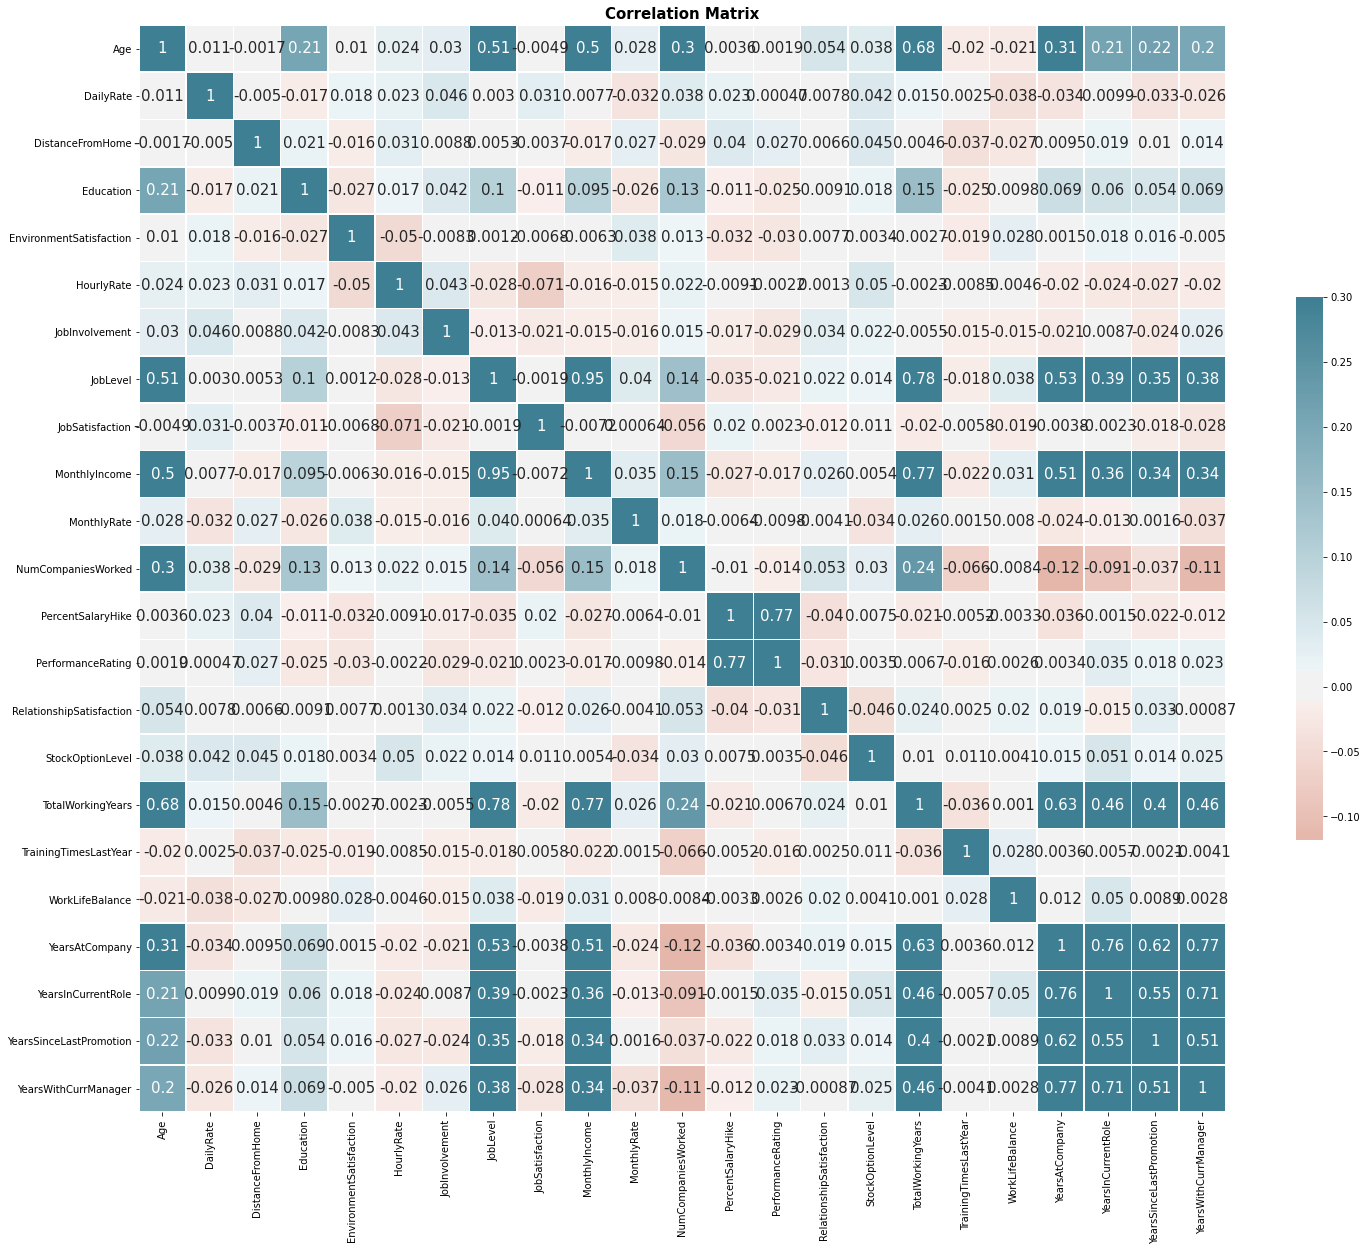

In [19]:
corr = dataSet.drop(['Attrition'], axis=1).corr()
palette = sns.diverging_palette(20, 220, n=256)
plt.figure(figsize=(25,20))
sns.heatmap(corr, annot=True, cmap=palette, vmax=.3, center=0, square=True, linewidths=.5, annot_kws={"size":15}, cbar_kws={'shrink': .5})
plt.title('Correlation Matrix', size=15, weight='bold')
plt.show()

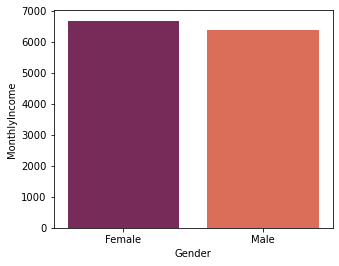

In [20]:
f,ax=plt.subplots(figsize=(5,4))
data = dataSet.groupby('Gender').mean().reset_index()
sns.barplot(data=data, x="Gender", y="MonthlyIncome", palette="rocket")

#### Data pre-processing

In [21]:
X= dataSet.drop('Attrition',axis=1)
y= dataSet['Attrition']

In [22]:
categorical = list(X.columns[X.dtypes=='object'])
numerical = list(X.drop(categorical ,axis=1))

In [23]:
X_cat = pd.get_dummies(X[categorical],drop_first=True)
X_num = MinMaxScaler().fit_transform(X[numerical])
X_num = pd.DataFrame(X_num,columns=X[numerical].columns)

#Create the new X object and look at it
X_new = pd.concat([X_num,X_cat],axis=1)
X_new.sample(5)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Married,MaritalStatus_Single,OverTime_Yes
297,0.404762,0.808876,0.535714,0.50,0.666667,0.942857,0.666667,0.50,0.333333,0.369194,...,0,0,0,0,0,1,0,1,0,0
587,0.809524,0.875447,0.357143,0.75,1.000000,0.742857,0.666667,0.25,0.666667,0.112691,...,1,0,0,0,0,0,0,1,0,0
253,0.571429,0.582677,0.571429,0.25,1.000000,0.742857,1.000000,0.25,0.000000,0.291522,...,0,0,0,0,1,0,0,0,1,1
1217,0.142857,0.342878,0.285714,0.50,0.666667,0.457143,1.000000,0.00,0.666667,0.178620,...,0,0,0,0,1,0,0,1,0,0
1397,0.857143,0.037938,0.285714,0.25,0.000000,0.528571,0.666667,0.25,0.666667,0.099421,...,0,0,0,0,1,0,0,1,0,0


#### Split the data in train and test set

In [24]:
X_train,X_test,y_train,y_test= train_test_split(X_new,y,test_size=0.20,shuffle=True)

print('X_train shape',X_train.shape)
print('X_test shape',X_test.shape)
print('y_train shape',y_train.shape)
print('y_test shape',y_test.shape)

X_train shape (1176, 44)
X_test shape (294, 44)
y_train shape (1176,)
y_test shape (294,)


#### Model Preparation with K-Fold validation - 

In [25]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['DecisionTreeClassifier',  DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['Support Vector Machine', SVC()])
models.append(['k-nearest neighbors', KNeighborsClassifier(n_neighbors=50)])
lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train, y = y_train, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    report = (classification_report(y_test, y_pred))
    
    print("\033[1m" + models[m][0],':'"\033[0m")
    print('')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('')
    print('classification_report: \n',report)
    print('________________________________________________________________')
    print('')
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :

[[244   4]
 [ 23  23]]
Accuracy Score:  0.9081632653061225

K-Fold Validation Mean Accuracy: 87.84 %

Standard Deviation: 1.99 %

ROC AUC Score: 0.74

Precision: 0.85

Recall: 0.50

F1: 0.63

classification_report: 
               precision    recall  f1-score   support

           0       0.91      0.98      0.95       248
           1       0.85      0.50      0.63        46

    accuracy                           0.91       294
   macro avg       0.88      0.74      0.79       294
weighted avg       0.90      0.91      0.90       294

________________________________________________________________

DecisionTreeClassifier :

[[218  30]
 [ 29  17]]
Accuracy Score:  0.7993197278911565

K-Fold Validation Mean Accuracy: 77.71 %

Standard Deviation: 2.76 %

ROC AUC Score: 0.62

Precision: 0.36

Recall: 0.37

F1: 0.37

classification_report: 
               precision    recall  f1-score   support

           0       0.88      0.88      0.88       248
           1   

#### Hyperparameters tuining with grid search CV

In [26]:
from sklearn.model_selection import GridSearchCV
grid_models = [(LogisticRegression(),[{'C':[0.25,0.5,0.75,1],'random_state':[0],"penalty":["l1","l2"]}]),# l1 lasso l2 ridge
               (SVC(),[{'C':[0.1, 1, 10, 100, 1000],'gamma': [1, 0.1, 0.01, 0.001],'kernel': ['rbf', 'linear']}]),
               (RandomForestClassifier(),[{'n_estimators':[100,150,200],'criterion':['gini','entropy'],'random_state':[0,20,40,50]}])]

In [27]:
for i,j in grid_models:
    grid = GridSearchCV(estimator=i,param_grid = j, scoring = 'accuracy',cv = 10)
    grid.fit(X_train, y_train)
    best_accuracy = grid.best_score_
    best_param = grid.best_params_
    print('{}:\nBest Accuracy : {:.2f}%'.format(i,best_accuracy*100))
    print('Best Parameters : ',best_param)
    print('')
    print('----------------')
    print('')

LogisticRegression():
Best Accuracy : 87.84%
Best Parameters :  {'C': 1, 'penalty': 'l2', 'random_state': 0}

----------------

SVC():
Best Accuracy : 88.10%
Best Parameters :  {'C': 10, 'gamma': 1, 'kernel': 'linear'}

----------------

RandomForestClassifier():
Best Accuracy : 85.46%
Best Parameters :  {'criterion': 'entropy', 'n_estimators': 100, 'random_state': 50}

----------------



#### SMOTE Data

In [28]:
print("Number transactions X_train dataset: ", X_train.shape)
print("Number transactions y_train dataset: ", y_train.shape)
print("Number transactions X_test dataset: ", X_test.shape)
print("Number transactions y_test dataset: ", y_test.shape)

Number transactions X_train dataset:  (1176, 44)
Number transactions y_train dataset:  (1176,)
Number transactions X_test dataset:  (294, 44)
Number transactions y_test dataset:  (294,)


In [29]:
print("Before OverSampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before OverSampling, counts of label '0': {} \n".format(sum(y_train==0)))

smote = SMOTE(random_state= 2, sampling_strategy = 0.9)
X_train_SMOTE, y_train_SMOTE = smote.fit_sample(X_train, y_train)

print('After OverSampling, the shape of train_X: {}'.format(X_train_SMOTE.shape))
print('After OverSampling, the shape of train_y: {} \n'.format(y_train_SMOTE.shape))

print("After OverSampling, counts of label '1': {}".format(sum(y_train_SMOTE==1)))
print("After OverSampling, counts of label '0': {}".format(sum(y_train_SMOTE==0)))

Before OverSampling, counts of label '1': 191
Before OverSampling, counts of label '0': 985 

After OverSampling, the shape of train_X: (1871, 44)
After OverSampling, the shape of train_y: (1871,) 

After OverSampling, counts of label '1': 886
After OverSampling, counts of label '0': 985


In [31]:
models = []
models.append(['Logistic Regreesion', LogisticRegression(random_state=0)])
models.append(['DecisionTreeClassifier',  DecisionTreeClassifier(random_state=0)])
models.append(['Random Forest', RandomForestClassifier(random_state=0)])
models.append(['Support Vector Machine', SVC()])
models.append(['k-nearest neighbors', KNeighborsClassifier(n_neighbors=100)])
lst_1= []

for m in range(len(models)):
    lst_2= []
    model = models[m][1]
    model.fit(X_train_SMOTE, y_train_SMOTE)
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)  #Confusion Matrix
    accuracies = cross_val_score(estimator = model, X = X_train_SMOTE, y = y_train_SMOTE, cv = 10)   #K-Fold Validation
    roc = roc_auc_score(y_test, y_pred)  #ROC AUC Score
    precision = precision_score(y_test, y_pred)  #Precision Score
    recall = recall_score(y_test, y_pred)  #Recall Score
    f1 = f1_score(y_test, y_pred)  #F1 Score
    report = (classification_report(y_test, y_pred))
    
    print("\033[1m" + models[m][0],':'"\033[0m")
    print('')
    print(cm)
    print('Accuracy Score: ',accuracy_score(y_test, y_pred))
    print('')
    print("K-Fold Validation Mean Accuracy: {:.2f} %".format(accuracies.mean()*100))
    print('')
    print("Standard Deviation: {:.2f} %".format(accuracies.std()*100))
    print('')
    print('ROC AUC Score: {:.2f}'.format(roc))
    print('')
    print('Precision: {:.2f}'.format(precision))
    print('')
    print('Recall: {:.2f}'.format(recall))
    print('')
    print('F1: {:.2f}'.format(f1))
    print('')
    print('classification_report: \n',report)
    
    print('___________________________________________________')
    print('')
    
    lst_2.append(models[m][0])
    lst_2.append((accuracy_score(y_test, y_pred))*100) 
    lst_2.append(accuracies.mean()*100)
    lst_2.append(accuracies.std()*100)
    lst_2.append(roc)
    lst_2.append(precision)
    lst_2.append(recall)
    lst_2.append(f1)
    lst_1.append(lst_2)

Logistic Regreesion :

[[192  56]
 [ 10  36]]
Accuracy Score:  0.7755102040816326

K-Fold Validation Mean Accuracy: 77.29 %

Standard Deviation: 3.70 %

ROC AUC Score: 0.78

Precision: 0.39

Recall: 0.78

F1: 0.52

classification_report: 
               precision    recall  f1-score   support

           0       0.95      0.77      0.85       248
           1       0.39      0.78      0.52        46

    accuracy                           0.78       294
   macro avg       0.67      0.78      0.69       294
weighted avg       0.86      0.78      0.80       294

___________________________________________________

DecisionTreeClassifier :

[[205  43]
 [ 36  10]]
Accuracy Score:  0.7312925170068028

K-Fold Validation Mean Accuracy: 83.28 %

Standard Deviation: 6.14 %

ROC AUC Score: 0.52

Precision: 0.19

Recall: 0.22

F1: 0.20

classification_report: 
               precision    recall  f1-score   support

           0       0.85      0.83      0.84       248
           1       0.19     